# Sentiment Analysis
This is a step by step tutorial for sentiment analysis using python

# Import needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk

# EDA

In [2]:
df = pd.read_csv('/kaggle/input/starbucks-reviews-dataset/reviews_data.csv')
df.head()

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...


In [3]:
df.shape

(850, 6)

In [4]:
df.isna().sum()

name             0
location         0
Date             0
Rating         145
Review           0
Image_Links      0
dtype: int64

In [5]:
df[df['Review'] == 'No Review Text'].head()

,name,location,Date,Rating,Review,Image_Links
62,Sharon,"Culpeper, VA","Reviewed July 18, 2022",2.0,No Review Text,['No Images']
100,Donald,"Orlando, FL","Reviewed Nov. 22, 2021",1.0,No Review Text,['No Images']
793,Maureen,"Lakewood, WA","Reviewed March 25, 2009",NaN,No Review Text,['No Images']
794,Maryellen,"Richmond, TX","Reviewed March 23, 2009",NaN,No Review Text,['No Images']
795,Ben,"Shanghai, OTHER","Reviewed March 23, 2009",NaN,No Review Text,['No Images']


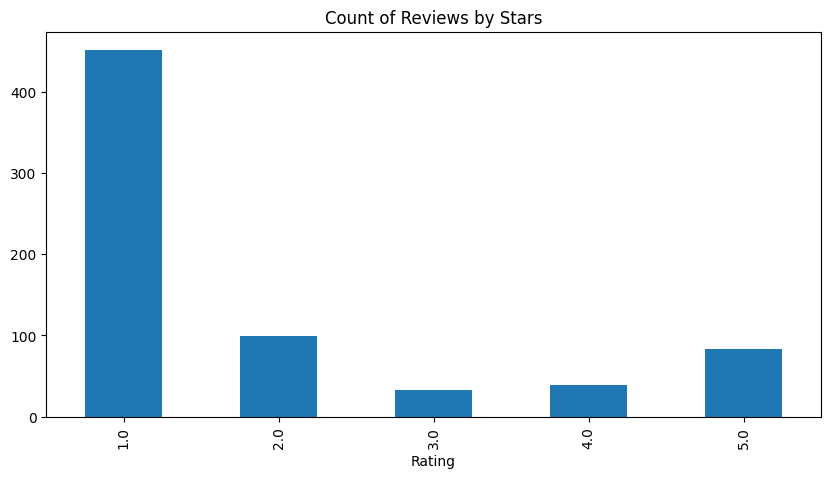

In [6]:
ax = df['Rating'].value_counts().sort_index()
ax.plot(kind='bar',title='Count of Reviews by Stars', figsize =(10,5))
plt.show()

In [7]:
## Example for the reviews
ex = df['Review'][10]
print(ex)

I filed a BBB complaint last month because Starbucks canceled my Starbucks Reward cards. I couldn't remember the balances, so I guessed about $9. Starbucks played nothing but games and tried everything they could to avoid responding to the complaint. I received a couple of phone call messages asking me to contact them directly and discuss the matter. The number provided was the customer service number and when I spoke with one representative, Linda hung up the phone on me. I did not use my card since 2012 which is my prerogative. Because of this and other reasons, Starbucks decided to close my Starbucks account. I reopened one about a few weeks ago and added a new card that I have not used yet.


In [8]:
tokens = nltk.word_tokenize(ex)
tokens[:10]

['I',
 'filed',
 'a',
 'BBB',
 'complaint',
 'last',
 'month',
 'because',
 'Starbucks',
 'canceled']

In [9]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('I', 'PRP'),
 ('filed', 'VBD'),
 ('a', 'DT'),
 ('BBB', 'NNP'),
 ('complaint', 'NN'),
 ('last', 'JJ'),
 ('month', 'NN'),
 ('because', 'IN'),
 ('Starbucks', 'NNP'),
 ('canceled', 'VBD')]

# Data Cleaning

In [10]:
# Remove all Review that contain no text
df = df[df['Review'] != 'No Review Text']
# fill the unrated review with 3    
df = df.fillna(3)

In [11]:
df.isna().sum()

name           0
location       0
Date           0
Rating         0
Review         0
Image_Links    0
dtype: int64

# Add ID column

In [12]:
df['id'] = range(1, len(df)+1)

In [13]:
df.head()

,name,location,Date,Rating,Review,Image_Links,id
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images'],1
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images'],2
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...,3
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images'],4
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...,5


# VADER Seniment

In [14]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [15]:
sia = SentimentIntensityAnalyzer()

In [16]:
sia.polarity_scores('I am Sad')

{'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}

In [17]:
sia.polarity_scores('lol')

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4215}

In [18]:
sia.polarity_scores(ex)

{'neg': 0.06, 'neu': 0.872, 'pos': 0.068, 'compound': -0.2732}

In [19]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    Review = row['Review']
    ID = row['id']
    res[ID] = sia.polarity_scores(Review)

  0%|          | 0/813 [00:00<?, ?it/s]

In [20]:
pd.DataFrame(res)

,1,2,3,4,5,6,7,8,9,10,...,804,805,806,807,808,809,810,811,812,813
neg,0.0000,0.0990,0.0870,0.0530,0.0000,0.1090,0.1910,0.0330,0.1960,0.2100,...,0.0000,0.0390,0.0,0.089,0.1310,0.0,0.0,0.0610,0.0890,0.1620
neu,0.7970,0.7550,0.7670,0.6820,0.6690,0.8910,0.8090,0.8180,0.8040,0.6490,...,0.8730,0.8960,1.0,0.874,0.8690,1.0,1.0,0.8800,0.8670,0.8380
pos,0.2030,0.1450,0.1450,0.2650,0.3310,0.0000,0.0000,0.1500,0.0000,0.1410,...,0.1270,0.0650,0.0,0.037,0.0000,0.0,0.0,0.0580,0.0440,0.0000
compound,0.8991,0.7766,0.5242,0.9698,0.9793,-0.7269,-0.8031,0.8994,-0.8316,-0.7912,...,0.7269,0.5859,0.0,-0.705,-0.3089,0.0,0.0,-0.0772,-0.3182,-0.6833


In [21]:
Vaders = pd.DataFrame(res).T
Vaders = Vaders.reset_index().rename(columns={'index':'id'})
Vaders = Vaders.merge(df, how='left')

In [22]:
Vaders.head()

,id,neg,neu,pos,compound,name,location,Date,Rating,Review,Image_Links
0,1,0.000,0.797,0.203,0.8991,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,2,0.099,0.755,0.145,0.7766,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,3,0.087,0.767,0.145,0.5242,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,4,0.053,0.682,0.265,0.9698,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,5,0.000,0.669,0.331,0.9793,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...


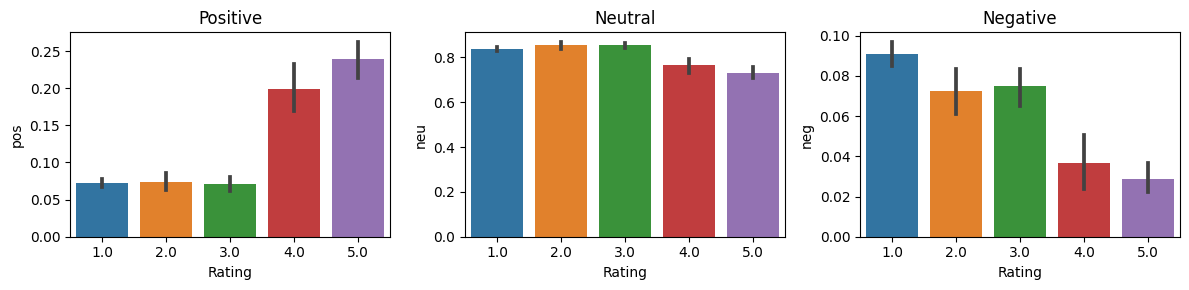

In [23]:
fig, axs = plt.subplots(1,3, figsize=(12,3))
sns.barplot(data = Vaders, x='Rating', y='pos', ax=axs[0])
sns.barplot(data = Vaders, x='Rating', y='neu', ax=axs[1])
sns.barplot(data = Vaders, x='Rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [24]:
MostNeg = Vaders[(Vaders.neg == max(Vaders.neg))]
print(MostNeg['Review'].iloc[0])

Starbucks customer service is horrible! Worst experience I ever had. No replies, help or understanding. Very cheap and rude! I cannot believe this is a big company. I do like their coffee. Too bad they have such a bad management.


In [25]:
MostPos = Vaders[Vaders['pos'] == max(Vaders['pos'])]
print(MostPos['Review'].iloc[0])

Best crew ever at Wade Hampton Greer South Carolina. Awesome group of people... Friendly, clean and best coffee anywhere.


In [26]:
MostNeu = Vaders[Vaders['neu'] == max(Vaders['neu'])]
print(MostNeu['Review'].iloc[0])

I spend about $30/day, is it asking too much to have a lid that does not fall off? I have contacted Starbucks customer service for months being told they are addressing the issue but nothing changes.


it seems like a negative review
let's take a better look at it

In [27]:
MostNeu[:1]

,id,neg,neu,pos,compound,name,location,Date,Rating,Review,Image_Links
23,24,0.0,1.0,0.0,0.0,Jennifer,"West Roxbury, MA","Reviewed April 30, 2023",1.0,"I spend about $30/day, is it asking too much t...",['https://media.consumeraffairs.com/files/cach...


# Conclusion
- It seems that the Valder technique failed to detect the negativity in this sentence, as evidenced by its rating of 0.
- It does with many other instances

So we need a new more accurate technique

# Hugging Face Pipeline
Hugging Face provides a versatile transformer known as *pipeline*, capable of performing various tasks. Among its functionalities is sentiment analysis, allowing for the assessment of emotional tone in text.

# Import the needed Libraries

In [28]:
from transformers import pipeline 
import warnings
warnings.filterwarnings('ignore')

2024-04-26 19:06:27.642198: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-26 19:06:27.642414: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-26 19:06:27.845126: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Prepare the Classifier

In [29]:
HF = pipeline(task="sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [30]:
HF("I'm mad")

[{'label': 'NEGATIVE', 'score': 0.9996427297592163}]

In [31]:
HF("WOW")

[{'label': 'POSITIVE', 'score': 0.999592125415802}]

# Apply to data

In [32]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    Review = row['Review']
    ID = row['id']
    res[ID] = HF(Review)

  0%|          | 0/813 [00:00<?, ?it/s]

In [33]:
resD = [{'label': v[0]['label'], 'score': v[0]['score']} for k,v in res.items()]
pipelineHF = pd.DataFrame(resD)
pipelineHF = pipelineHF.reset_index().rename(columns={'index':'id'})
pipelineHF = pipelineHF.merge(Vaders, how='left')
pipelineHF = pipelineHF.drop(0)

In [34]:
pipelineHF.head()

,id,label,score,neg,neu,pos,compound,name,location,Date,Rating,Review,Image_Links
1,1,POSITIVE,0.998526,0.000,0.797,0.203,0.8991,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
2,2,NEGATIVE,0.996533,0.099,0.755,0.145,0.7766,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
3,3,POSITIVE,0.663701,0.087,0.767,0.145,0.5242,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
4,4,POSITIVE,0.999719,0.053,0.682,0.265,0.9698,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
5,5,NEGATIVE,0.999061,0.000,0.669,0.331,0.9793,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...


# Comparison
Here we will compare between the value of postive, negative and neutral of vader to the labels of pipeline

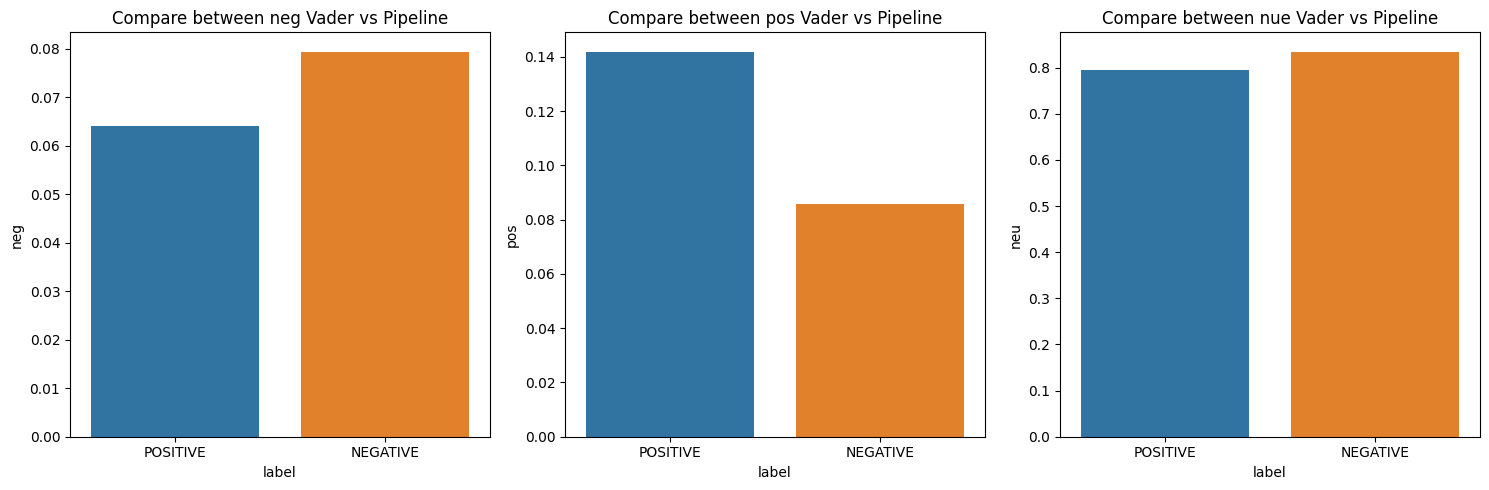

In [35]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
sns.barplot(x = 'label' ,y = 'neg' , data = pipelineHF , ax = axs[0] , ci = 0).set_title('Compare between neg Vader vs Pipeline')
sns.barplot(x = 'label' ,y = 'pos' , data = pipelineHF , ax = axs[1] , ci = 0).set_title('Compare between pos Vader vs Pipeline')
sns.barplot(x = 'label' ,y = 'neu' , data = pipelineHF , ax = axs[2] , ci = 0).set_title('Compare between nue Vader vs Pipeline')
plt.tight_layout()
plt.show()

Text(0.5, 0.98, 'Distribution of pos and neg against the labels')

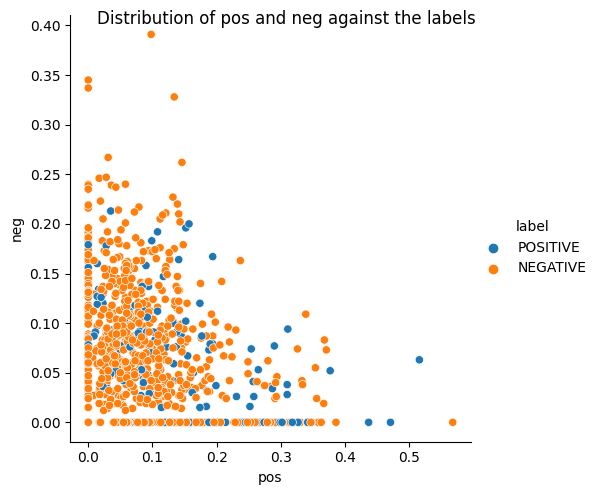

In [36]:
sns.relplot(x='pos', y='neg', data=pipelineHF, hue = 'label', kind='scatter').fig.suptitle("Distribution of pos and neg against the labels")

# Get the most of everything

In [37]:
positive_only = pipelineHF.loc[pipelineHF['label'] == 'POSITIVE']
Max_Pos_Value = max(positive_only['score'])
positive_only.loc[positive_only['score'] == Max_Pos_Value].Review.iloc[0]

'Great coffee selections, the food could use some improvement based on what I have tried. I believe that is premade and stored in a refrigerator and then taken out and warmed up later.'

In [38]:
Max_Pos_Value = max(pipelineHF['pos'])
pipelineHF.loc[pipelineHF['pos'] == Max_Pos_Value].Review.iloc[0]

'Best crew ever at Wade Hampton Greer South Carolina. Awesome group of people... Friendly, clean and best coffee anywhere.'

In [39]:
negative_only = pipelineHF.loc[pipelineHF['label'] == 'NEGATIVE']
Max_Neg_Value = max(negative_only['score'])
negative_only.loc[negative_only['score'] == Max_Neg_Value].Review.iloc[0]

'This Tuesday I had the most horrible experience with renting a car at the Orlando airport through Orbitz and Alamo. When I stopped at the Starbucks to get something to drink and rethink what I was going to do in my situation I was on the phone with the Orbitz manager who was completely useless and the cashier at the Starbucks in the airport overheard the conversation and decided to be helpful, thoughtful and she saved my faith in humanity!! I was on the phone arguing with the manager at Orbitz and ordered my drink, I went to put my credit card in the machine and she said, "You’re all good." I was already upset with everybody else I had ran into so I almost bit her head off thinking she was incompetent for not charging my card. '

In [40]:
Max_Neg_Value = max(pipelineHF['neg'])
pipelineHF.loc[pipelineHF['neg'] == Max_Neg_Value].Review.iloc[0]

'Starbucks customer service is horrible! Worst experience I ever had. No replies, help or understanding. Very cheap and rude! I cannot believe this is a big company. I do like their coffee. Too bad they have such a bad management.'

# Conclusion
In this notebook, we conducted a comparison between the Vader technique and a pipeline from Hugging Face. Our analysis revealed that the pipeline consistently outperformed Vader across multiple sentences, indicating its superior performance in sentiment analysis. This suggests that the pipeline offers a more robust and reliable approach, thereby enhancing the overall strength of sentiment analysis models.

# References
1. https://www.kaggle.com/code/robikscube/sentiment-analysis-python-youtube-tutorial
2. https://medium.com/analytics-vidhya/nlp-getting-started-with-sentiment-analysis-126fcd61cc4a
3. https://huggingface.co/docs/transformers/v4.40.1/en/task_summary#text-classification